In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.utils import shuffle 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import keras
from keras.utils import to_categorical
import os
from keras.layers import *
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.models import Sequential, Model
from keras import optimizers

In [2]:
df_full = pd.read_csv('./dataset_full.csv')

In [3]:
df_full.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
df_full.columns[:56]

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
       'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain',
       'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain',
       'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain',
       'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain',
       'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain',
       'domain_length', 'domain_in_ip', 'server_client_domain',
       'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory',
     

In [5]:
df_full.columns[56:]

Index(['qty_percent_directory', 'directory_length', 'qty_dot_file',
       'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file',
       'qty_questionmark_file', 'qty_equal_file', 'qty_at_file',
       'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length', 'qty_dot_params',
       'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params',
       'qty_questionmark_params', 'qty_equal_params', 'qty_at_params',
       'qty_and_params', 'qty_exclamation_params', 'qty_space_params',
       'qty_tilde_params', 'qty_comma_params', 'qty_plus_params',
       'qty_asterisk_params', 'qty_hashtag_params', 'qty_dollar_params',
       'qty_percent_params', 'params_length', 'tld_present_params',
       'qty_params', 'email_in_url', 'time_response', 'domain_spf', 'asn_ip',
       'time_domain_activation', 'time_domain_expi

In [27]:
df_dataset = pd.read_csv('./dataset.csv')

In [28]:
df_dataset.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [8]:
df_auckland = pd.read_csv('./Website Phishing - auckland institute of studies.csv')

In [9]:
df_auckland.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [3]:
def parse_arff(filename):
	try:
		file = open(filename)
	except:
		print('file could not found or opened, try with file location')
	columns = []
	data = []

	for line in file:
		if line.startswith('@attribute'):
			line = line.strip()
			temp = line.split()
			columns.append(temp[1])
		elif line.startswith('@') or line.startswith('\n'):
			continue
		else:
			line = line.strip()
			temp = line.split(',')
			data.append(temp)

	return data,columns

In [4]:
data, columns = parse_arff('./Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)

In [12]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.3)

In [20]:
x_train = np.array(x_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
x_test = np.array(x_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [6]:
loss_fn = keras.losses.Huber(delta=1.0)
activation = ['softplus', 'softsign', 'selu', 'elu', 'exponential', 'tanh', 'sigmoid', 'relu']
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl']
binary_loss = ['binary_crossentropy', 'hinge', 'squared_hinge', loss_fn]

In [18]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (48,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='softplus'))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.9079 - val_loss: 0.2159 - val_accuracy: 0.9417
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.8081 - val_loss: 0.2725 - val_accuracy: 0.9213
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.9081 - val_loss: 0.2273 - val_accuracy: 0.9313
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2286 - accuracy: 0.9287 - val_loss: 0.2192 - val_accuracy: 0.9193
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2273 - accuracy: 0.9306 - val_loss: 0.2305 - val_accuracy: 0.9423
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2201 - accuracy: 0.9347 - val_loss: 0.2141 - val_accuracy: 0.9350
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2239 - accuracy: 0.9337 - val_loss: 0.2120 - val_accuracy: 0.9427
Epoch 

In [24]:
x = x_train.reshape((x_train.shape[0], 1, 48))
xx = x_test.reshape((x_test.shape[0], 1, 48))

In [25]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,48)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))

Epoch 1/20
219/219 [==============================] - 3s 12ms/step - loss: 0.5173 - accuracy: 0.7714 - val_loss: 0.3449 - val_accuracy: 0.8947
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.3733 - accuracy: 0.8987 - val_loss: 0.3422 - val_accuracy: 0.9200
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.3128 - accuracy: 0.8944 - val_loss: 0.2811 - val_accuracy: 0.9337
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.3311 - accuracy: 0.8794 - val_loss: 0.3003 - val_accuracy: 0.9040
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.2967 - accuracy: 0.9163 - val_loss: 0.2562 - val_accuracy: 0.9220
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.2571 - accuracy: 0.9176 - val_loss: 0.2630 - val_accuracy: 0.9307
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.2569 - accuracy: 0.9239 - val_loss: 0.2553 - val_accuracy: 0.9307
Epoch

In [28]:
x = x_train.reshape((x_train.shape[0], 4, 4, 3))
xt = x_test.reshape((x_test.shape[0], 4, 4, 3))

In [29]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(4, 4, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))

Epoch 1/20
219/219 [==============================] - 1s 5ms/step - loss: 0.8438 - accuracy: 0.5883 - val_loss: 0.5941 - val_accuracy: 0.7020
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.6392 - accuracy: 0.6710 - val_loss: 0.5938 - val_accuracy: 0.6753
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.6022 - accuracy: 0.7009 - val_loss: 0.5020 - val_accuracy: 0.7683
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.5848 - accuracy: 0.7350 - val_loss: 0.4807 - val_accuracy: 0.7743
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.5520 - accuracy: 0.7440 - val_loss: 0.5541 - val_accuracy: 0.7053
Epoch 6/20
219/219 [==============================] - 2s 11ms/step - loss: 0.5433 - accuracy: 0.7611 - val_loss: 0.4531 - val_accuracy: 0.7977
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.5316 - accuracy: 0.7746 - val_loss: 0.4439 - val_accuracy: 0.8093
Epoch

In [31]:
df_auckland.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [32]:
x_train, x_test, y_train, y_test = train_test_split(df_auckland[df_auckland.columns[:-1]],df_auckland[df_auckland.columns[-1]], test_size = 0.3)

In [53]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (9,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='softplus'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2288 - accuracy: 0.1637 - val_loss: -0.4891 - val_accuracy: 0.0690
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: -1.6586 - accuracy: 0.0792 - val_loss: -4.4243 - val_accuracy: 0.0690
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: -5.2909 - accuracy: 0.0971 - val_loss: -5.5702 - val_accuracy: 0.1724
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: -5.9602 - accuracy: 0.2513 - val_loss: -5.9282 - val_accuracy: 0.2906
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: -6.1506 - accuracy: 0.3178 - val_loss: -6.0276 - val_accuracy: 0.3079
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: -6.2682 - accuracy: 0.3252 - val_loss: -6.1104 - val_accuracy: 0.3103
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: -6.3589 - accuracy: 0.3347 - val_loss: -5.9784 - val_accuracy: 0.2463
Epoch 

In [56]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)

x = x_train.reshape((x_train.shape[0], 1, 9))
xx = x_test.reshape((x_test.shape[0], 1, 9))

In [57]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,9)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

In [63]:
model.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2890 - accuracy: 0.4393 - val_loss: 0.3311 - val_accuracy: 0.3596
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2894 - accuracy: 0.4414 - val_loss: 0.3297 - val_accuracy: 0.3695
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2886 - accuracy: 0.4414 - val_loss: 0.3296 - val_accuracy: 0.3596
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.4414 - val_loss: 0.3300 - val_accuracy: 0.3645
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2888 - accuracy: 0.4414 - val_loss: 0.3310 - val_accuracy: 0.3473
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2881 - accuracy: 0.4414 - val_loss: 0.3316 - val_accuracy: 0.3547
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2866 - accuracy: 0.4446 - val_loss: 0.3306 - val_accuracy: 0.3571
Epoch 8/20
30/30 [=

In [64]:
x = x_train.reshape((x_train.shape[0], 1, 3, 3))
xt = x_test.reshape((x_test.shape[0], 1, 3, 3))

In [66]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(1, 3, 3)))
model.add(keras.layers.MaxPool2D(1,1))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

In [69]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))

Epoch 1/20
30/30 [==============================] - 0s 13ms/step - loss: -6.8390 - accuracy: 0.4013 - val_loss: -6.5541 - val_accuracy: 0.3571
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: -7.1061 - accuracy: 0.4013 - val_loss: -6.5797 - val_accuracy: 0.3719
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: -7.1155 - accuracy: 0.4161 - val_loss: -6.5874 - val_accuracy: 0.3793
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: -7.0951 - accuracy: 0.4097 - val_loss: -6.5835 - val_accuracy: 0.3818
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: -7.0879 - accuracy: 0.4139 - val_loss: -6.5814 - val_accuracy: 0.3818
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: -7.0882 - accuracy: 0.4192 - val_loss: -6.5772 - val_accuracy: 0.3892
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: -7.1067 - accuracy: 0.4129 - val_loss: -6.5864 - val_accuracy: 0.3768
Epoch

In [70]:
df_full.head()  

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [71]:
x_train, x_test, y_train, y_test = train_test_split(df_full[df_full.columns[:-1]], df_full[df_full.columns[-1]], test_size = 0.3)

In [72]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)

In [73]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (111,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='softplus'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
1940/1940 [==============================] - 5s 3ms/step - loss: 0.5614 - accuracy: 0.8512 - val_loss: 0.4787 - val_accuracy: 0.8268
Epoch 2/20
1940/1940 [==============================] - 5s 2ms/step - loss: 0.4376 - accuracy: 0.8725 - val_loss: 0.4452 - val_accuracy: 0.8880
Epoch 3/20
1940/1940 [==============================] - 6s 3ms/step - loss: 0.4130 - accuracy: 0.8764 - val_loss: 0.4085 - val_accuracy: 0.8839
Epoch 4/20
1940/1940 [==============================] - 5s 3ms/step - loss: 0.3990 - accuracy: 0.8903 - val_loss: 0.4006 - val_accuracy: 0.8808
Epoch 5/20
1940/1940 [==============================] - 7s 3ms/step - loss: 0.3999 - accuracy: 0.8842 - val_loss: 0.4253 - val_accuracy: 0.8922
Epoch 6/20
1940/1940 [==============================] - 6s 3ms/step - loss: 0.3749 - accuracy: 0.8895 - val_loss: 0.4073 - val_accuracy: 0.9011
Epoch 7/20
1940/1940 [==============================] - 6s 3ms/step - loss: 0.3444 - accuracy: 0.8941 - val_loss: 0.3505 - val_accuracy:

In [74]:
x = x_train.reshape((x_train.shape[0], 1, 111))
xx = x_test.reshape((x_test.shape[0], 1, 111))

In [75]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,111)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

In [76]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))

Epoch 1/20
1940/1940 [==============================] - 12s 6ms/step - loss: 0.3442 - accuracy: 0.8800 - val_loss: 0.2831 - val_accuracy: 0.9078
Epoch 2/20
1940/1940 [==============================] - 11s 6ms/step - loss: 0.2730 - accuracy: 0.9109 - val_loss: 0.2764 - val_accuracy: 0.9122
Epoch 3/20
1940/1940 [==============================] - 11s 6ms/step - loss: 0.2579 - accuracy: 0.9162 - val_loss: 0.2584 - val_accuracy: 0.9151
Epoch 4/20
1940/1940 [==============================] - 11s 6ms/step - loss: 0.2415 - accuracy: 0.9194 - val_loss: 0.2626 - val_accuracy: 0.9176
Epoch 5/20
1940/1940 [==============================] - 11s 6ms/step - loss: 0.2352 - accuracy: 0.9215 - val_loss: 0.2588 - val_accuracy: 0.9188
Epoch 6/20
1940/1940 [==============================] - 11s 6ms/step - loss: 0.2275 - accuracy: 0.9240 - val_loss: 0.2550 - val_accuracy: 0.9210
Epoch 7/20
1940/1940 [==============================] - 12s 6ms/step - loss: 0.2238 - accuracy: 0.9262 - val_loss: 0.2472 - val_ac

In [81]:
x = x_train.reshape((x_train.shape[0], 3, 37, 1))
xt = x_test.reshape((x_test.shape[0], 3, 37, 1))

In [80]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(3, 37, 1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

In [83]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 10, validation_data=(xt, y_test))

Epoch 1/10
1940/1940 [==============================] - 29s 15ms/step - loss: 0.3253 - accuracy: 0.8914 - val_loss: 0.2609 - val_accuracy: 0.8946
Epoch 2/10
1940/1940 [==============================] - 27s 14ms/step - loss: 0.2837 - accuracy: 0.8985 - val_loss: 0.2516 - val_accuracy: 0.8981
Epoch 3/10
1940/1940 [==============================] - 24s 12ms/step - loss: 0.2728 - accuracy: 0.9008 - val_loss: 0.2542 - val_accuracy: 0.8992
Epoch 4/10
1940/1940 [==============================] - 23s 12ms/step - loss: 0.2694 - accuracy: 0.9013 - val_loss: 0.2544 - val_accuracy: 0.8986
Epoch 5/10
1940/1940 [==============================] - 24s 12ms/step - loss: 0.2697 - accuracy: 0.9017 - val_loss: 0.2549 - val_accuracy: 0.9002
Epoch 6/10
1940/1940 [==============================] - 24s 12ms/step - loss: 0.2648 - accuracy: 0.9026 - val_loss: 0.2487 - val_accuracy: 0.9016
Epoch 7/10
1940/1940 [==============================] - 23s 12ms/step - loss: 0.2626 - accuracy: 0.9030 - val_loss: 0.2525 -

In [88]:
df_dataset.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [89]:
df_dataset.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [92]:
col = ['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES']

In [93]:
x_train, x_test, y_train, y_test = train_test_split(df_dataset[col], df_dataset[df_dataset.columns[-1]], test_size = 0.3)

In [94]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)

In [95]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (13,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='softplus'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
39/39 [==============================] - 0s 8ms/step - loss: 0.9874 - accuracy: 0.8628 - val_loss: 0.6878 - val_accuracy: 0.8822
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5647 - accuracy: 0.8949 - val_loss: 0.6333 - val_accuracy: 0.8935
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.9109 - val_loss: 0.5366 - val_accuracy: 0.8991
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5070 - accuracy: 0.9045 - val_loss: 0.5217 - val_accuracy: 0.8953
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.9197 - val_loss: 0.6767 - val_accuracy: 0.8766
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3487 - accuracy: 0.9230 - val_loss: 0.5650 - val_accuracy: 0.8879
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.9310 - val_loss: 0.5564 - val_accuracy: 0.8860
Epoch 8/20
39/39 [==

In [96]:
x = x_train.reshape((x_train.shape[0], 1, 13))
xx = x_test.reshape((x_test.shape[0], 1, 13))

model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,13)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))

Epoch 1/20
39/39 [==============================] - 1s 26ms/step - loss: 0.6200 - accuracy: 0.7729 - val_loss: 0.3654 - val_accuracy: 0.8804
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.3587 - accuracy: 0.8860 - val_loss: 0.2958 - val_accuracy: 0.8991
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.2771 - accuracy: 0.9021 - val_loss: 0.2581 - val_accuracy: 0.9047
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.2290 - accuracy: 0.9125 - val_loss: 0.2391 - val_accuracy: 0.9084
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.1933 - accuracy: 0.9262 - val_loss: 0.2304 - val_accuracy: 0.9065
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.1671 - accuracy: 0.9318 - val_loss: 0.2244 - val_accuracy: 0.9178
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.1536 - accuracy: 0.9454 - val_loss: 0.2149 - val_accuracy: 0.9234
Epoch 8/20
39/39 [=

In [98]:
x = x_train.reshape((x_train.shape[0], 13, 1, 1))
xt = x_test.reshape((x_test.shape[0], 13, 1, 1))

model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(13, 1, 1)))
model.add(keras.layers.MaxPool2D(1,1))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))

Epoch 1/20
39/39 [==============================] - 0s 13ms/step - loss: 1.0020 - accuracy: 0.8371 - val_loss: 0.3754 - val_accuracy: 0.8822
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4477 - accuracy: 0.8692 - val_loss: 0.2906 - val_accuracy: 0.8991
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5022 - accuracy: 0.8804 - val_loss: 0.2534 - val_accuracy: 0.9103
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4133 - accuracy: 0.8909 - val_loss: 0.2965 - val_accuracy: 0.9178
Epoch 5/20
39/39 [==============================] - 0s 9ms/step - loss: 0.3349 - accuracy: 0.9061 - val_loss: 0.2607 - val_accuracy: 0.9047
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.3174 - accuracy: 0.9093 - val_loss: 0.2765 - val_accuracy: 0.9121
Epoch 7/20
39/39 [==============================] - 0s 10ms/step - loss: 0.2306 - accuracy: 0.9165 - val_loss: 0.2520 - val_accuracy: 0.9121
Epoch 8/20
39/39 [

In [29]:
df_dataset.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [30]:
columns = ['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS',
       'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']

df_dataset = df_dataset[columns]

In [31]:
df_dataset.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [32]:
for col in columns[:-1]:
    df_dataset[col].fillna(value=df_dataset[col].mean(), inplace=True)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df_dataset[df_dataset.columns[:-1]],df_dataset[df_dataset.columns[-1]], test_size = 0.3)

In [34]:
x_train = np.array(x_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
x_test = np.array(x_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [35]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (13,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='softplus'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
39/39 [==============================] - 1s 14ms/step - loss: 2.2763 - accuracy: 0.8523 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 8/20
39/39 [=

In [36]:
x = x_train.reshape((x_train.shape[0], 1, 13))
xx = x_test.reshape((x_test.shape[0], 1, 13))

model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1, 13)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))

Epoch 1/20
39/39 [==============================] - 1s 32ms/step - loss: 2.9111 - accuracy: 0.7745 - val_loss: 2.3354 - val_accuracy: 0.8355
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 2.2312 - accuracy: 0.8274 - val_loss: 1.9510 - val_accuracy: 0.8673
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 1.9977 - accuracy: 0.8451 - val_loss: 1.8651 - val_accuracy: 0.8729
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 1.9478 - accuracy: 0.8539 - val_loss: 1.9725 - val_accuracy: 0.8692
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 1.8333 - accuracy: 0.8652 - val_loss: 1.7804 - val_accuracy: 0.8822
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 1.7490 - accuracy: 0.8684 - val_loss: 1.3142 - val_accuracy: 0.9121
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 1.6990 - accuracy: 0.8732 - val_loss: 1.3172 - val_accuracy: 0.9121
Epoch 8/20
39/39 [=

In [40]:
x = x_train.reshape((x_train.shape[0], 13, 1, 1))
xt = x_test.reshape((x_test.shape[0], 13, 1, 1))

model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(13, 1, 1)))
model.add(keras.layers.MaxPool2D(1,1))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 30, validation_data=(xt, y_test))

Epoch 1/30
39/39 [==============================] - 1s 21ms/step - loss: 2.2515 - accuracy: 0.8531 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 2/30
39/39 [==============================] - 0s 10ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 3/30
39/39 [==============================] - 0s 10ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 4/30
39/39 [==============================] - 0s 9ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 5/30
39/39 [==============================] - 0s 9ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 6/30
39/39 [==============================] - 0s 10ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 7/30
39/39 [==============================] - 0s 9ms/step - loss: 2.0674 - accuracy: 0.8660 - val_loss: 1.4128 - val_accuracy: 0.9084
Epoch 8/30
39/39

In [43]:
data, columns = parse_arff('./Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.3)
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [6]:
model = keras.Sequential()
model.add(keras.layers.LSTM(32, activation='relu',return_sequences=True, input_shape=(15, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(keras.layers.Reshape((32, 2, 2)))
model.add(keras.layers.Conv2D(128,(1,1), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='softplus'))

In [7]:
x = x_train.reshape((x_train.shape[0], 15, 2))
xt = x_test.reshape((x_test.shape[0], 15, 2))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))

Epoch 1/20
242/242 [==============================] - 6s 26ms/step - loss: 0.3953 - accuracy: 0.8541 - val_loss: 0.2870 - val_accuracy: 0.9093
Epoch 2/20
242/242 [==============================] - 6s 23ms/step - loss: 0.3200 - accuracy: 0.9000 - val_loss: 0.2677 - val_accuracy: 0.9132
Epoch 3/20
242/242 [==============================] - 6s 23ms/step - loss: 0.2803 - accuracy: 0.9048 - val_loss: 0.2498 - val_accuracy: 0.9192
Epoch 4/20
242/242 [==============================] - 6s 23ms/step - loss: 0.2826 - accuracy: 0.9010 - val_loss: 0.5312 - val_accuracy: 0.6696
Epoch 5/20
242/242 [==============================] - 6s 23ms/step - loss: 0.2888 - accuracy: 0.8923 - val_loss: 0.2192 - val_accuracy: 0.9270
Epoch 6/20
242/242 [==============================] - 5s 22ms/step - loss: 0.2382 - accuracy: 0.9186 - val_loss: 0.2284 - val_accuracy: 0.9292
Epoch 7/20
242/242 [==============================] - 6s 23ms/step - loss: 0.2353 - accuracy: 0.9225 - val_loss: 0.2215 - val_accuracy: 0.9285

In [12]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(keras.layers.Reshape((32, 4)))
model.add(keras.layers.LSTM(32, activation='relu',return_sequences=True, input_shape=(32, 4)))
model.add(Flatten())
model.add(keras.layers.Reshape((32, 16, 2)))
model.add(keras.layers.Conv2D(128, (1,1), input_shape=(32, 15, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(1,activation='softplus'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
242/242 [==============================] - 11s 44ms/step - loss: 0.3481 - accuracy: 0.8679 - val_loss: 0.2410 - val_accuracy: 0.9195
Epoch 2/20
242/242 [==============================] - 10s 40ms/step - loss: 0.2449 - accuracy: 0.9138 - val_loss: 0.2095 - val_accuracy: 0.9216
Epoch 3/20
242/242 [==============================] - 10s 40ms/step - loss: 0.2167 - accuracy: 0.9182 - val_loss: 0.1971 - val_accuracy: 0.9243
Epoch 4/20
242/242 [==============================] - 10s 40ms/step - loss: 0.2053 - accuracy: 0.9201 - val_loss: 0.1883 - val_accuracy: 0.9234
Epoch 5/20
242/242 [==============================] - 10s 40ms/step - loss: 0.1936 - accuracy: 0.9219 - val_loss: 0.1780 - val_accuracy: 0.9276
Epoch 6/20
242/242 [==============================] - 10s 40ms/step - loss: 0.1831 - accuracy: 0.9257 - val_loss: 0.1727 - val_accuracy: 0.9289
Epoch 7/20
242/242 [==============================] - 10s 41ms/step - loss: 0.1756 - accuracy: 0.9289 - val_loss: 0.1665 - val_accuracy:

In [19]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(keras.layers.Reshape((16, 4, 2)))
model.add(keras.layers.Conv2D(128, (1,1), input_shape=(16, 4, 2), activation='relu'))
model.add(Flatten())
model.add(keras.layers.Reshape((64, 128)))
model.add(keras.layers.LSTM(32, activation='relu',return_sequences=True, input_shape=(64, 128)))
model.add(Flatten())
model.add(Dense(1,activation='softplus'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
242/242 [==============================] - 10s 43ms/step - loss: 0.3591 - accuracy: 0.8559 - val_loss: 0.1916 - val_accuracy: 0.9195
Epoch 2/20
242/242 [==============================] - 10s 40ms/step - loss: 0.1915 - accuracy: 0.9243 - val_loss: 0.1738 - val_accuracy: 0.9279
Epoch 3/20
242/242 [==============================] - 9s 39ms/step - loss: 0.1781 - accuracy: 0.9300 - val_loss: 0.1680 - val_accuracy: 0.9289
Epoch 4/20
242/242 [==============================] - 9s 39ms/step - loss: 0.1616 - accuracy: 0.9347 - val_loss: 0.1588 - val_accuracy: 0.9337
Epoch 5/20
242/242 [==============================] - 9s 39ms/step - loss: 0.1501 - accuracy: 0.9382 - val_loss: 0.1617 - val_accuracy: 0.9403
Epoch 6/20
242/242 [==============================] - 9s 38ms/step - loss: 0.1422 - accuracy: 0.9411 - val_loss: 0.1515 - val_accuracy: 0.9403
Epoch 7/20
242/242 [==============================] - 10s 39ms/step - loss: 0.1335 - accuracy: 0.9440 - val_loss: 0.1426 - val_accuracy: 0.9

In [21]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))
model.add(keras.layers.Dense(30,activation='relu'))
model.add(keras.layers.Reshape((2,5,3)))
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

In [22]:
x = x_train.reshape((x_train.shape[0], 1, 30))
xx = x_test.reshape((x_test.shape[0], 1, 30))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))

Epoch 1/20
242/242 [==============================] - 3s 13ms/step - loss: 0.4186 - accuracy: 0.8078 - val_loss: 0.2017 - val_accuracy: 0.9319
Epoch 2/20
242/242 [==============================] - 2s 9ms/step - loss: 0.2186 - accuracy: 0.9235 - val_loss: 0.1750 - val_accuracy: 0.9331
Epoch 3/20
242/242 [==============================] - 2s 9ms/step - loss: 0.1987 - accuracy: 0.9296 - val_loss: 0.1650 - val_accuracy: 0.9373
Epoch 4/20
242/242 [==============================] - 2s 9ms/step - loss: 0.2108 - accuracy: 0.9305 - val_loss: 0.1634 - val_accuracy: 0.9349
Epoch 5/20
242/242 [==============================] - 2s 9ms/step - loss: 0.1826 - accuracy: 0.9311 - val_loss: 0.1670 - val_accuracy: 0.9415
Epoch 6/20
242/242 [==============================] - 2s 9ms/step - loss: 0.1708 - accuracy: 0.9340 - val_loss: 0.1581 - val_accuracy: 0.9397
Epoch 7/20
242/242 [==============================] - 2s 9ms/step - loss: 0.1644 - accuracy: 0.9385 - val_loss: 0.1487 - val_accuracy: 0.9433
Epoch

In [25]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))
model.add(keras.layers.Dense(30,activation='relu'))
model.add(keras.layers.Reshape((1, 30)))
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

In [26]:
x = x_train.reshape((x_train.shape[0], 2, 5, 3))
xt = x_test.reshape((x_test.shape[0], 2, 5, 3))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))

Epoch 1/20
242/242 [==============================] - 3s 13ms/step - loss: 0.5512 - accuracy: 0.7357 - val_loss: 0.4823 - val_accuracy: 0.7814
Epoch 2/20
242/242 [==============================] - 2s 9ms/step - loss: 0.4373 - accuracy: 0.8015 - val_loss: 0.4065 - val_accuracy: 0.8113
Epoch 3/20
242/242 [==============================] - 2s 9ms/step - loss: 0.4099 - accuracy: 0.8183 - val_loss: 0.3884 - val_accuracy: 0.8233
Epoch 4/20
242/242 [==============================] - 2s 9ms/step - loss: 0.4033 - accuracy: 0.8235 - val_loss: 0.3728 - val_accuracy: 0.8282
Epoch 5/20
242/242 [==============================] - 2s 9ms/step - loss: 0.3873 - accuracy: 0.8289 - val_loss: 0.3594 - val_accuracy: 0.8450
Epoch 6/20
242/242 [==============================] - 2s 9ms/step - loss: 0.3721 - accuracy: 0.8341 - val_loss: 0.3633 - val_accuracy: 0.8417
Epoch 7/20
242/242 [==============================] - 2s 9ms/step - loss: 0.3722 - accuracy: 0.8360 - val_loss: 0.3530 - val_accuracy: 0.8490
Epoch

In [41]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(keras.layers.Reshape((32, 4)))
model.add(keras.layers.LSTM(32, activation='relu', return_sequences=True, input_shape=(32, 4)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='softplus'))

In [44]:
x = x_train.reshape((x_train.shape[0], 2, 5, 3))
xt = x_test.reshape((x_test.shape[0], 2, 5, 3))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))

Epoch 1/20
242/242 [==============================] - 6s 24ms/step - loss: 0.3283 - accuracy: 0.9033 - val_loss: 0.2317 - val_accuracy: 0.9165
Epoch 2/20
242/242 [==============================] - 5s 22ms/step - loss: 0.2491 - accuracy: 0.9270 - val_loss: 0.2015 - val_accuracy: 0.9207
Epoch 3/20
242/242 [==============================] - 6s 23ms/step - loss: 0.2273 - accuracy: 0.9337 - val_loss: 0.2322 - val_accuracy: 0.9403
Epoch 4/20
242/242 [==============================] - 6s 24ms/step - loss: 0.2293 - accuracy: 0.9294 - val_loss: 0.2218 - val_accuracy: 0.9319
Epoch 5/20
242/242 [==============================] - 6s 24ms/step - loss: 0.2115 - accuracy: 0.9384 - val_loss: 0.1935 - val_accuracy: 0.9406
Epoch 6/20
242/242 [==============================] - 5s 19ms/step - loss: 0.1997 - accuracy: 0.9416 - val_loss: 0.2219 - val_accuracy: 0.9406
Epoch 7/20
242/242 [==============================] - 7s 30ms/step - loss: 0.1944 - accuracy: 0.9442 - val_loss: 0.2121 - val_accuracy: 0.9442

In [66]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.3)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)
x_train = np.array(x_train).astype(np.int16)
y_train = np.array(y_train).astype(np.int16)
x_test = np.array(x_test).astype(np.int16)
y_test = np.array(y_test).astype(np.int16)

In [6]:
model = keras.Sequential()
model.add(keras.layers.LSTM(32, activation='relu',return_sequences=True, input_shape=(15, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(keras.layers.Reshape((32, 2, 2)))
model.add(keras.layers.Conv2D(128,(1,1), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='softplus'))

x = x_train.reshape((x_train.shape[0], 15, 2))
xt = x_test.reshape((x_test.shape[0], 15, 2))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xt, y_test))

In [63]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_shape = (30,), activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Reshape((16, 8)))
#model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(16, 8)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Reshape((8, 16)))
model.add(keras.layers.Conv1D(128,(1),activation='relu'))
#model.add(keras.layers.Dropout(0.2))
#model.add(keras.layers.Dense(128, activation='relu'))
#model.add(keras.layers.Dropout(0.2))
model.add(Dense(1,activation='softplus'))

In [64]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 64)                1984      
_________________________________________________________________
dense_128 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_129 (Dense)            (None, 128)               16512     
_________________________________________________________________
reshape_57 (Reshape)         (None, 16, 8)             0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 128)               70144     
_________________________________________________________________
dropout_51 (Dropout)         (None, 128)               0         
_________________________________________________________________
reshape_58 (Reshape)         (None, 8, 16)           

In [7]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [8]:
model = keras.Sequential()#Combined Model 1
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))
model.add(keras.layers.Dense(30,activation='relu'))
model.add(keras.layers.Reshape((1, 30)))
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))
x = x_train.reshape((x_train.shape[0], 2, 5, 3))
xt = x_test.reshape((x_test.shape[0], 2, 5, 3))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 150, validation_data=(xt, y_test))

Epoch 1/150
242/242 [==============================] - 3s 11ms/step - loss: 0.5544 - accuracy: 0.7316 - val_loss: 0.4356 - val_accuracy: 0.8037
Epoch 2/150
242/242 [==============================] - 3s 11ms/step - loss: 0.4465 - accuracy: 0.8063 - val_loss: 0.4068 - val_accuracy: 0.8143
Epoch 3/150
242/242 [==============================] - 3s 11ms/step - loss: 0.4187 - accuracy: 0.8115 - val_loss: 0.3860 - val_accuracy: 0.8212
Epoch 4/150
242/242 [==============================] - 2s 10ms/step - loss: 0.3993 - accuracy: 0.8213 - val_loss: 0.3717 - val_accuracy: 0.8306
Epoch 5/150
242/242 [==============================] - 2s 8ms/step - loss: 0.3827 - accuracy: 0.8251 - val_loss: 0.3656 - val_accuracy: 0.8312
Epoch 6/150
242/242 [==============================] - 2s 8ms/step - loss: 0.3735 - accuracy: 0.8325 - val_loss: 0.3586 - val_accuracy: 0.8297
Epoch 7/150
242/242 [==============================] - 2s 9ms/step - loss: 0.3702 - accuracy: 0.8369 - val_loss: 0.3501 - val_accuracy: 0.

Epoch 58/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2616 - accuracy: 0.8916 - val_loss: 0.3225 - val_accuracy: 0.8812
Epoch 59/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2632 - accuracy: 0.8908 - val_loss: 0.3189 - val_accuracy: 0.8845
Epoch 60/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2577 - accuracy: 0.8907 - val_loss: 0.3024 - val_accuracy: 0.8921
Epoch 61/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2557 - accuracy: 0.8960 - val_loss: 0.2933 - val_accuracy: 0.8927
Epoch 62/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2549 - accuracy: 0.8930 - val_loss: 0.3046 - val_accuracy: 0.8888
Epoch 63/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2573 - accuracy: 0.8940 - val_loss: 0.2939 - val_accuracy: 0.8957
Epoch 64/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2558 - accuracy: 0.8931 - val_loss: 0.2726 - val_accuracy:

Epoch 115/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2188 - accuracy: 0.9071 - val_loss: 0.3096 - val_accuracy: 0.8909
Epoch 116/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2132 - accuracy: 0.9116 - val_loss: 0.2901 - val_accuracy: 0.9005
Epoch 117/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2119 - accuracy: 0.9090 - val_loss: 0.2939 - val_accuracy: 0.9035
Epoch 118/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2099 - accuracy: 0.9110 - val_loss: 0.2915 - val_accuracy: 0.8990
Epoch 119/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2076 - accuracy: 0.9174 - val_loss: 0.3083 - val_accuracy: 0.8906
Epoch 120/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2108 - accuracy: 0.9138 - val_loss: 0.2895 - val_accuracy: 0.8996
Epoch 121/150
242/242 [==============================] - 2s 7ms/step - loss: 0.2199 - accuracy: 0.9107 - val_loss: 0.3203 - val_ac

In [9]:
pred = model.predict(xt)

In [22]:
modelpred = []
for i in range(len(y_test)):
    if pred[i][0] < 0.5:
        modelpred.append(0)
    else:
        modelpred.append(1)

[[1337  178]
 [ 153 1649]]
accuracy :  0.9002110340669279
f1 :  0.9087903003582254
precision :  0.9025725232621784
recall :  0.9150943396226415
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1515
           1       0.90      0.92      0.91      1802

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



<AxesSubplot:>

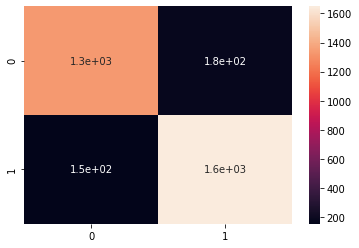

In [26]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score #precision_recall_fscore_support(y_test, model5_pred)
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm_bnb = confusion_matrix(y_test, modelpred)
print(cm_bnb)
print("accuracy : ", str(accuracy_score(y_test, modelpred)))
print("f1 : ", str(f1_score(y_test, modelpred)))
print("precision : ", str(precision_score(y_test, modelpred)))
print("recall : ", str(recall_score(y_test, modelpred)))
print(str(classification_report(y_test, modelpred)))
sns.heatmap(cm_bnb, annot=True)

In [28]:
model = keras.Sequential()#Combined Model 3
model.add(Dense(64, input_shape = (30,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(keras.layers.Reshape((16, 4, 2)))
model.add(keras.layers.Conv2D(128, (1,1), input_shape=(16, 4, 2), activation='relu'))
model.add(Flatten())
model.add(keras.layers.Reshape((64, 128)))
model.add(keras.layers.LSTM(32, activation='relu',return_sequences=True, input_shape=(64, 128)))
model.add(Flatten())
model.add(Dense(1,activation='softplus'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 150, validation_data=(x_test, y_test))

Epoch 1/150
242/242 [==============================] - 11s 45ms/step - loss: 0.3363 - accuracy: 0.8651 - val_loss: 0.2321 - val_accuracy: 0.9144
Epoch 2/150
242/242 [==============================] - 7s 29ms/step - loss: 0.2179 - accuracy: 0.9151 - val_loss: 0.2128 - val_accuracy: 0.9171
Epoch 3/150
242/242 [==============================] - 7s 28ms/step - loss: 0.2068 - accuracy: 0.9187 - val_loss: 0.2144 - val_accuracy: 0.9216
Epoch 4/150
242/242 [==============================] - 7s 29ms/step - loss: 0.2530 - accuracy: 0.9194 - val_loss: 0.2215 - val_accuracy: 0.9198
Epoch 5/150
242/242 [==============================] - 7s 29ms/step - loss: 0.7017 - accuracy: 0.8911 - val_loss: 1.3356 - val_accuracy: 0.8511
Epoch 6/150
242/242 [==============================] - 7s 29ms/step - loss: 0.3880 - accuracy: 0.9123 - val_loss: 0.2154 - val_accuracy: 0.9216
Epoch 7/150
242/242 [==============================] - 7s 28ms/step - loss: 0.1920 - accuracy: 0.9254 - val_loss: 0.2116 - val_accuracy

242/242 [==============================] - 7s 29ms/step - loss: 0.0918 - accuracy: 0.9602 - val_loss: 0.1893 - val_accuracy: 0.9515
Epoch 58/150
242/242 [==============================] - 7s 28ms/step - loss: 0.0898 - accuracy: 0.9603 - val_loss: 0.1718 - val_accuracy: 0.9515
Epoch 59/150
242/242 [==============================] - 7s 29ms/step - loss: 0.0869 - accuracy: 0.9616 - val_loss: 0.1717 - val_accuracy: 0.9521
Epoch 60/150
242/242 [==============================] - 7s 28ms/step - loss: 0.0878 - accuracy: 0.9621 - val_loss: 0.1771 - val_accuracy: 0.9515
Epoch 61/150
242/242 [==============================] - 7s 30ms/step - loss: 0.0856 - accuracy: 0.9632 - val_loss: 0.1833 - val_accuracy: 0.9512
Epoch 62/150
242/242 [==============================] - 7s 28ms/step - loss: 0.0814 - accuracy: 0.9636 - val_loss: 0.1915 - val_accuracy: 0.9542
Epoch 63/150
242/242 [==============================] - 7s 30ms/step - loss: 0.0821 - accuracy: 0.9639 - val_loss: 0.2016 - val_accuracy: 0.950

242/242 [==============================] - 7s 29ms/step - loss: 0.0537 - accuracy: 0.9807 - val_loss: 0.2339 - val_accuracy: 0.9620
Epoch 114/150
242/242 [==============================] - 7s 29ms/step - loss: 0.1041 - accuracy: 0.9776 - val_loss: 0.3631 - val_accuracy: 0.9503
Epoch 115/150
242/242 [==============================] - 7s 28ms/step - loss: 0.0696 - accuracy: 0.9795 - val_loss: 0.2132 - val_accuracy: 0.9599
Epoch 116/150
242/242 [==============================] - 7s 28ms/step - loss: 0.0419 - accuracy: 0.9833 - val_loss: 0.2242 - val_accuracy: 0.9614
Epoch 117/150
242/242 [==============================] - 7s 28ms/step - loss: 0.0404 - accuracy: 0.9853 - val_loss: 0.2325 - val_accuracy: 0.9623
Epoch 118/150
242/242 [==============================] - 7s 29ms/step - loss: 0.0422 - accuracy: 0.9838 - val_loss: 0.2350 - val_accuracy: 0.9611
Epoch 119/150
242/242 [==============================] - 7s 28ms/step - loss: 0.0415 - accuracy: 0.9859 - val_loss: 0.2349 - val_accuracy:

[[1449   66]
 [  58 1744]]
accuracy :  0.9626168224299065
f1 :  0.9656699889258028
precision :  0.96353591160221
recall :  0.9678135405105438
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1515
           1       0.96      0.97      0.97      1802

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



<AxesSubplot:>

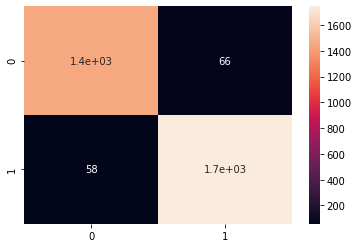

In [29]:
pred = model.predict(x_test)
modelpred = []
for i in range(len(y_test)):
    if pred[i][0] < 0.5:
        modelpred.append(0)
    else:
        modelpred.append(1)

cm_bnb = confusion_matrix(y_test, modelpred)
print(cm_bnb)
print("accuracy : ", str(accuracy_score(y_test, modelpred)))
print("f1 : ", str(f1_score(y_test, modelpred)))
print("precision : ", str(precision_score(y_test, modelpred)))
print("recall : ", str(recall_score(y_test, modelpred)))
print(str(classification_report(y_test, modelpred)))
sns.heatmap(cm_bnb, annot=True)

In [36]:
model = keras.Sequential()#Combined Model 2
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))
model.add(keras.layers.Dense(30,activation='relu'))
model.add(keras.layers.Reshape((2,5,3)))
model.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(1,1))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))
x = x_train.reshape((x_train.shape[0], 1, 30))
xx = x_test.reshape((x_test.shape[0], 1, 30))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 150, validation_data=(xx, y_test))

Epoch 1/150
242/242 [==============================] - 3s 13ms/step - loss: 0.4278 - accuracy: 0.8078 - val_loss: 0.2138 - val_accuracy: 0.9237
Epoch 2/150
242/242 [==============================] - 2s 10ms/step - loss: 0.2160 - accuracy: 0.9236 - val_loss: 0.1898 - val_accuracy: 0.9261
Epoch 3/150
242/242 [==============================] - 3s 12ms/step - loss: 0.2041 - accuracy: 0.9279 - val_loss: 0.1848 - val_accuracy: 0.9289
Epoch 4/150
242/242 [==============================] - 2s 10ms/step - loss: 0.1933 - accuracy: 0.9291 - val_loss: 0.1934 - val_accuracy: 0.9301
Epoch 5/150
242/242 [==============================] - 3s 14ms/step - loss: 0.1815 - accuracy: 0.9316 - val_loss: 0.1764 - val_accuracy: 0.9316
Epoch 6/150
242/242 [==============================] - 3s 10ms/step - loss: 0.1772 - accuracy: 0.9359 - val_loss: 0.1737 - val_accuracy: 0.9313
Epoch 7/150
242/242 [==============================] - 3s 11ms/step - loss: 0.1667 - accuracy: 0.9358 - val_loss: 0.1687 - val_accuracy:

Epoch 58/150
242/242 [==============================] - 2s 9ms/step - loss: 0.0891 - accuracy: 0.9650 - val_loss: 0.1509 - val_accuracy: 0.9563
Epoch 59/150
242/242 [==============================] - 3s 13ms/step - loss: 0.0789 - accuracy: 0.9708 - val_loss: 0.1519 - val_accuracy: 0.9557
Epoch 60/150
242/242 [==============================] - 3s 14ms/step - loss: 0.0679 - accuracy: 0.9754 - val_loss: 0.1483 - val_accuracy: 0.9560
Epoch 61/150
242/242 [==============================] - 3s 12ms/step - loss: 0.0645 - accuracy: 0.9760 - val_loss: 0.1607 - val_accuracy: 0.9575
Epoch 62/150
242/242 [==============================] - 3s 12ms/step - loss: 0.0643 - accuracy: 0.9745 - val_loss: 0.1660 - val_accuracy: 0.9545
Epoch 63/150
242/242 [==============================] - 3s 11ms/step - loss: 0.0653 - accuracy: 0.9753 - val_loss: 0.1758 - val_accuracy: 0.9557
Epoch 64/150
242/242 [==============================] - 3s 11ms/step - loss: 0.0617 - accuracy: 0.9756 - val_loss: 0.1734 - val_acc

Epoch 115/150
242/242 [==============================] - 2s 9ms/step - loss: 0.0434 - accuracy: 0.9809 - val_loss: 0.2211 - val_accuracy: 0.9605
Epoch 116/150
242/242 [==============================] - 2s 9ms/step - loss: 0.0412 - accuracy: 0.9833 - val_loss: 0.2347 - val_accuracy: 0.9611
Epoch 117/150
242/242 [==============================] - 2s 9ms/step - loss: 0.0431 - accuracy: 0.9824 - val_loss: 0.2115 - val_accuracy: 0.9581
Epoch 118/150
242/242 [==============================] - 2s 9ms/step - loss: 0.0403 - accuracy: 0.9828 - val_loss: 0.2165 - val_accuracy: 0.9584
Epoch 119/150
242/242 [==============================] - 2s 9ms/step - loss: 0.0409 - accuracy: 0.9831 - val_loss: 0.2256 - val_accuracy: 0.9623
Epoch 120/150
242/242 [==============================] - 2s 9ms/step - loss: 0.0512 - accuracy: 0.9831 - val_loss: 0.1877 - val_accuracy: 0.9608
Epoch 121/150
242/242 [==============================] - 2s 9ms/step - loss: 0.0441 - accuracy: 0.9837 - val_loss: 0.2723 - val_ac

[[1438   77]
 [  46 1756]]
accuracy :  0.962918299668375
f1 :  0.966162310866575
precision :  0.9579923622476814
recall :  0.974472807991121
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1515
           1       0.96      0.97      0.97      1802

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



<AxesSubplot:>

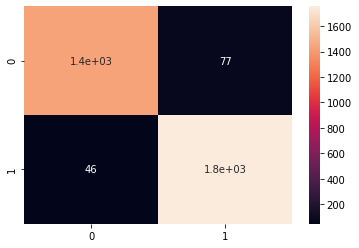

In [37]:
pred = model.predict(xx)
modelpred = []
for i in range(len(y_test)):
    if pred[i][0] < 0.5:
        modelpred.append(0)
    else:
        modelpred.append(1)

cm_bnb = confusion_matrix(y_test, modelpred)
print(cm_bnb)
print("accuracy : ", str(accuracy_score(y_test, modelpred)))
print("f1 : ", str(f1_score(y_test, modelpred)))
print("precision : ", str(precision_score(y_test, modelpred)))
print("recall : ", str(recall_score(y_test, modelpred)))
print(str(classification_report(y_test, modelpred)))
sns.heatmap(cm_bnb, annot=True)